# 1) Problem Statement

    - This Project understands how the student's performance (test score) is affected by other variables such as Gender, Ethnicity
      parantal level of eduction ,Lunch and Test perparation course 

import required libaries 

In [95]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [79]:
df = pd.read_csv('Data/StudentsPerformance.csv')

In [80]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [81]:
df.shape

(1000, 8)

In [82]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no missing value in give dataset

In [83]:
df.duplicated().sum()

np.int64(0)

NO duplicated are found 

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [85]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

check statistics of dataset

In [86]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


check the various categorie present in the different categorical columns 

In [87]:
print("Categories of 'gender' variable:"  ,end=""  )
print(df['gender'].value_counts())

print("Categories of 'race/ethnicity' variable:"  ,end=""  )
print(df['race/ethnicity'].value_counts())

print("Categories of 'parental level of education' variable:"  ,end=""  )
print(df['parental level of education'].value_counts())

print("Categories of 'lunch' variable:"  ,end=""  )
print(df['lunch'].value_counts())

print("Categories of ''test preparation course' variable:"  ,end=""  )
print(df['test preparation course'].value_counts())

print("Categories of 'math score' variable:"  ,end=""  )
print(df['math score'].unique())

print("Categories of 'reading score variable:"  ,end=""  )
print(df['reading score'].unique())

print("Categories of 'writing score' variable:"  ,end=""  )
print(df['writing score'].unique())

Categories of 'gender' variable:gender
female    518
male      482
Name: count, dtype: int64
Categories of 'race/ethnicity' variable:race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
Categories of 'parental level of education' variable:parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
Categories of 'lunch' variable:lunch
standard        645
free/reduced    355
Name: count, dtype: int64
Categories of ''test preparation course' variable:test preparation course
none         642
completed    358
Name: count, dtype: int64
Categories of 'math score' variable:[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98 

define the categorical features & nummerical features 

In [88]:
numerical_features = [ features for features in df.columns if df[features].dtype != 'O']
categorica_features = [features for features in df.columns if df[features].dtype == 'O']

print(f"we have {len(numerical_features)} numerical features {numerical_features}\n")
print(f"we have {len(categorica_features)}  categorical features {categorica_features}")

we have 3 numerical features ['math score', 'reading score', 'writing score']

we have 5  categorical features ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [89]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Addiding columns of 'Total score' & 'Average'

In [90]:
df['total score']= df['math score'] + df['reading score'] + df['writing score']
df['Average'] = df['total score']/3

In [91]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [92]:
math_full= df[df['math score']==100]['Average'].count()
reading_full= df[df['reading score']==100]['Average'].count()
writing_full= df[df['writing score']==100]['Average'].count()

print(f"No. of student how score full  marks in  math",math_full)
print(f"No. of student how score full  marks in  reading ",reading_full)
print(f"No. of student how score full  marks in  writing ",writing_full)

No. of student how score full  marks in  math 7
No. of student how score full  marks in  reading  17
No. of student how score full  marks in  writing  14


In [93]:
math_full= df[df['math score'] <=20]['Average'].count()
reading_full= df[df['reading score'] <=20]['Average'].count()
writing_full= df[df['writing score'] <=20]['Average'].count()

print(f"No. of student how score less than 20 marks in  math",math_full)
print(f"No. of student how score less than 20  marks in  reading ",reading_full)
print(f"No. of student how score less than 20 marks in  writing ",writing_full)

No. of student how score less than 20 marks in  math 4
No. of student how score less than 20  marks in  reading  1
No. of student how score less than 20 marks in  writing  3


on abouve scenario the student will perfrom in reading but worth perform in math 

Exploring the data( visualization)

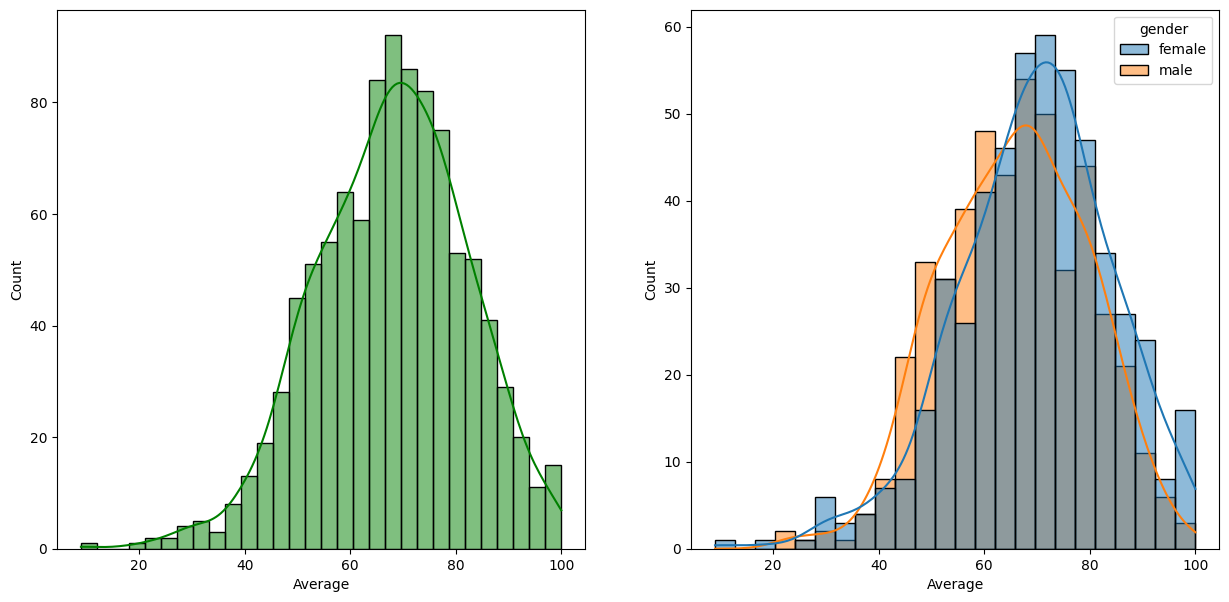

In [97]:
plt.subplots(1,2 ,figsize=(15, 7))
plt.subplot(121)
sns.histplot(data = df, x="Average" , bins= 30 ,kde = True,color = 'g')
plt.subplot(122)
sns.histplot(data=df,x="Average", kde=True,hue = 'gender')
plt.show()

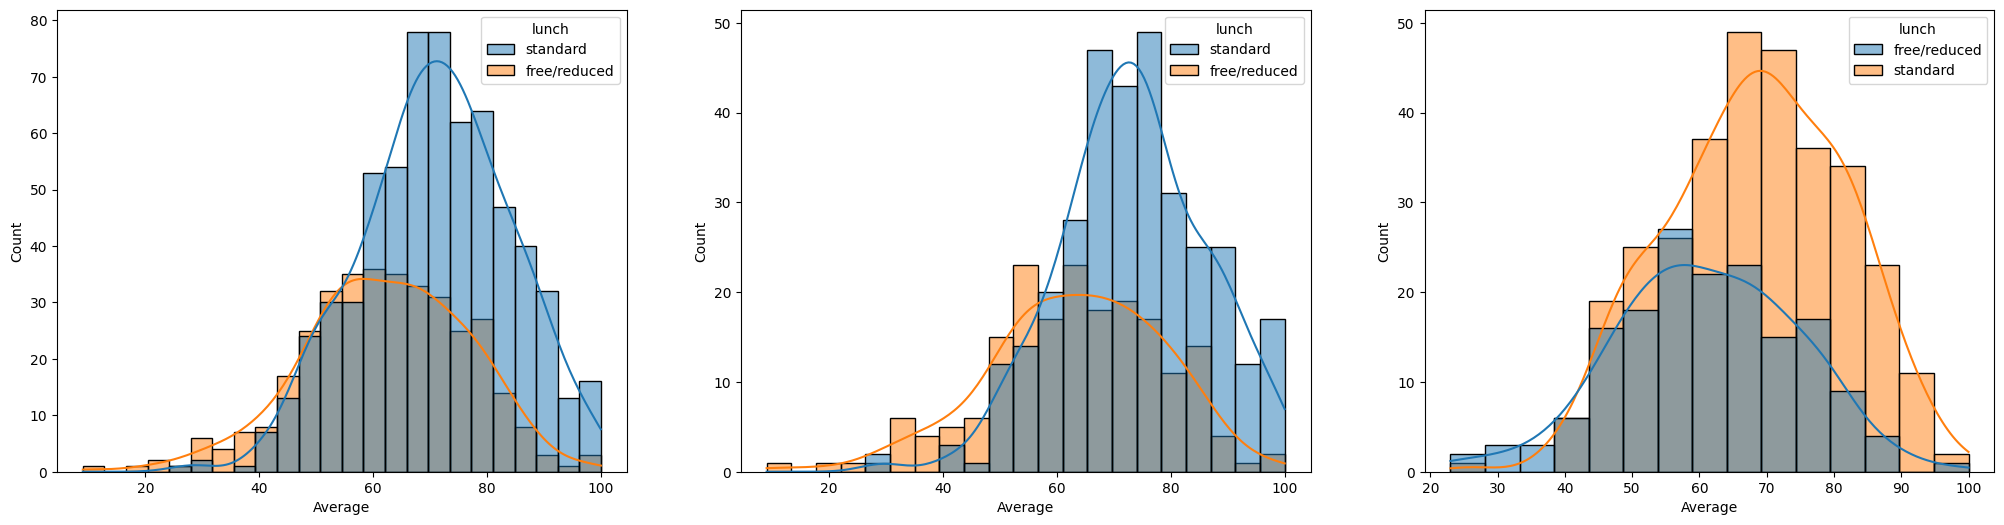

In [111]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x = "Average", kde=True, hue="lunch")
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x = "Average", kde=True, hue="lunch") 
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x = "Average", kde=True, hue="lunch") 
plt.show()

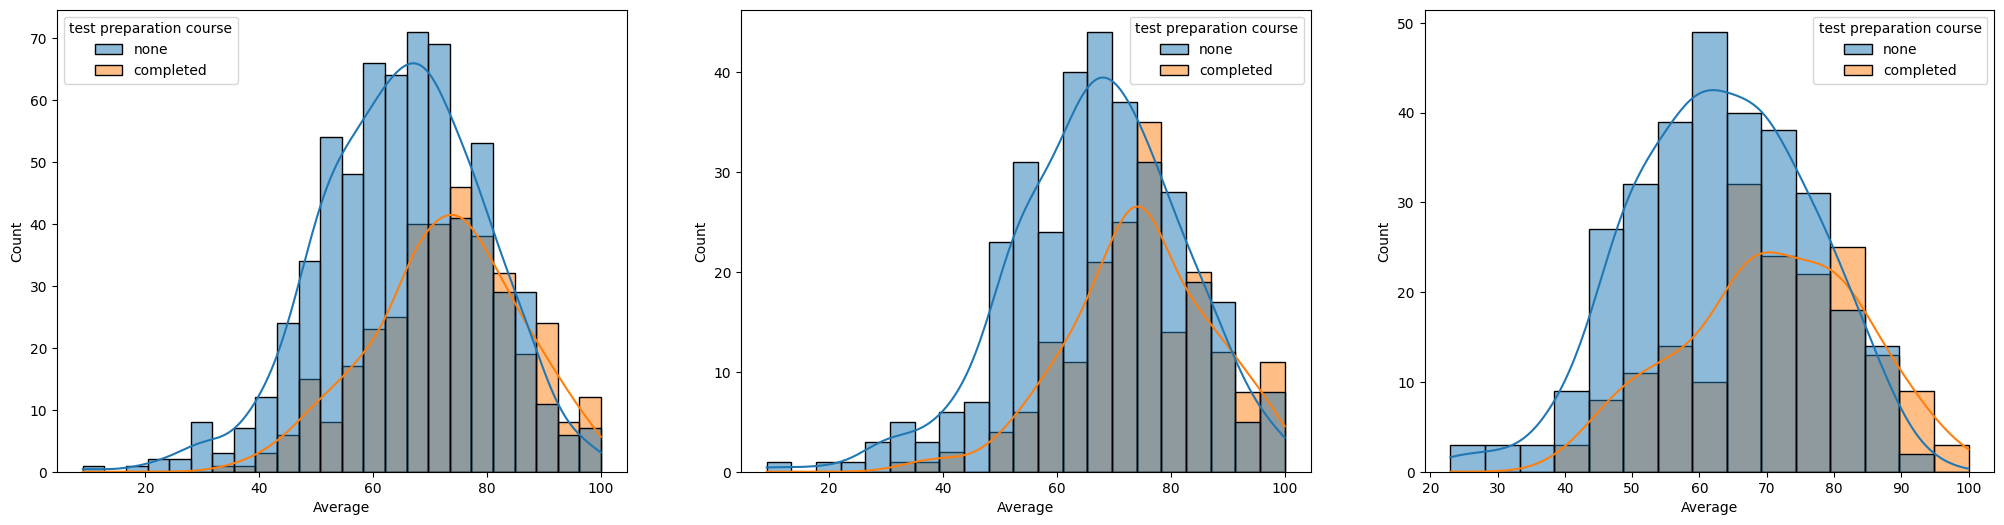

In [112]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x = "Average", kde=True, hue="test preparation course")
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x = "Average", kde=True, hue="test preparation course") 
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x = "Average", kde=True, hue="test preparation course") 
plt.show()